<a href="https://colab.research.google.com/github/TrickyTroll/ML-intro/blob/Tricky/OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Following a tutorial to learn about classification

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


## Loading the minst data

In [ ]:
((train_data, train_labels), (test_data, test_labels)) = mnist.load_data()
num_data = np.vstack([trainData, testData])
num_labels = np.hstack([trainLabels, testLabels])

In [ ]:
train_data.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_data.shape

(10000, 28, 28)

## Preprocessing

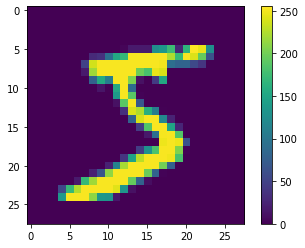

In [ ]:
plt.figure()
plt.imshow(train_data[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_labels[0]

5

In [ ]:
train_images = train_data / 255.0
test_images = test_data / 255.0

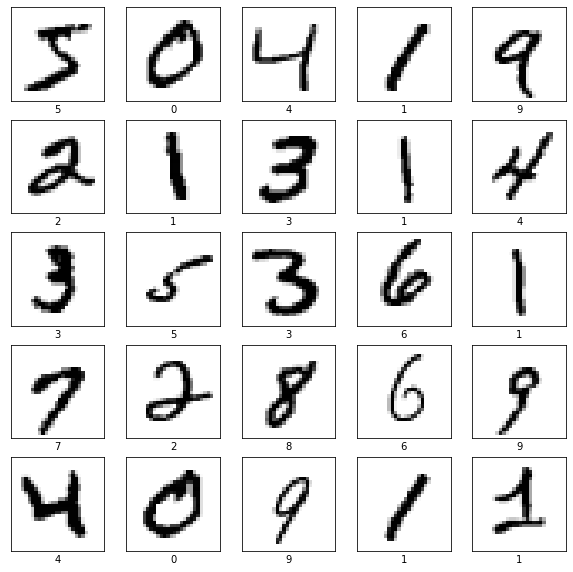

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1682 - accuracy: 0.7315
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4859 - accuracy: 0.8745
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3829 - accuracy: 0.8952
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3421 - accuracy: 0.9041
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3181 - accuracy: 0.9093
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3016 - accuracy: 0.9132
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2880 - accuracy: 0.9166
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2769 - accuracy: 0.9204
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2664 - accuracy: 0.9230
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.256

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.2489 - accuracy: 0.9288

Test accuracy: 0.9287999868392944


In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

In [ ]:
predictions[0]

array([1.0120212e-04, 6.1608318e-09, 1.3874492e-04, 2.1755907e-03,
       4.6168253e-07, 4.1708470e-05, 2.1749744e-09, 9.9657840e-01,
       1.5216967e-05, 9.4867579e-04], dtype=float32)

In [ ]:
np.argmax(predictions[0])

7

In [ ]:
test_labels[0]

7

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

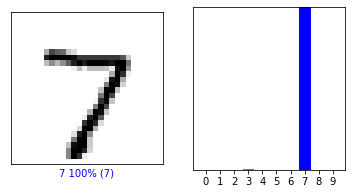

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

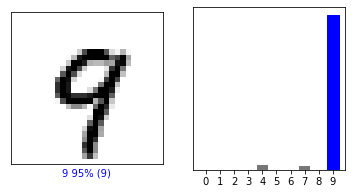

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

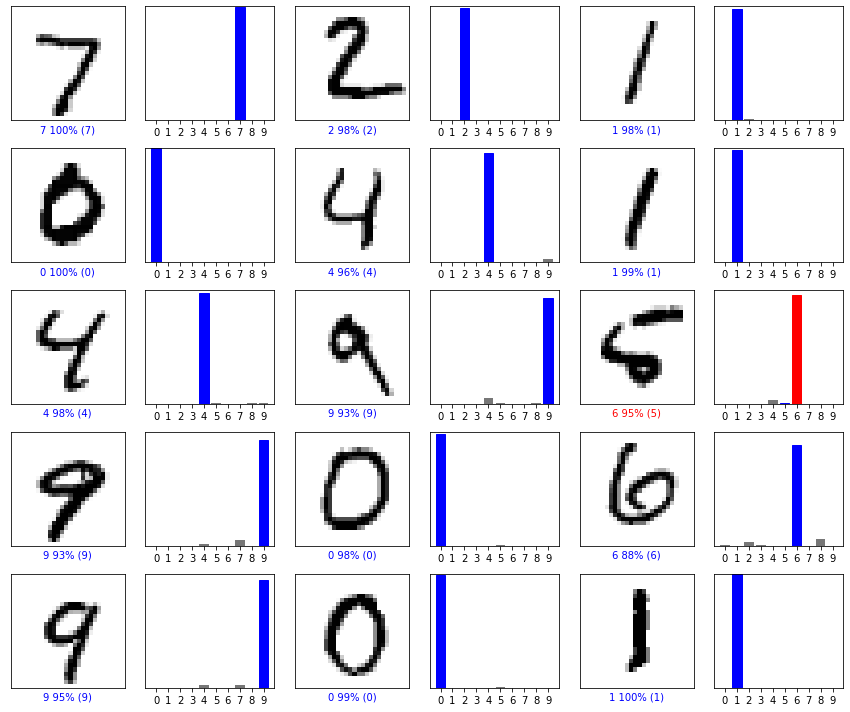

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[2.1257268e-03 9.2621776e-06 9.8266131e-01 4.2963037e-03 2.3912197e-10
  3.6267219e-03 6.1760782e-03 3.2345286e-11 1.1045412e-03 4.3409293e-10]]


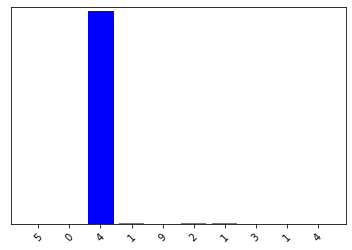

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), train_labels, rotation=45) #The labels are wrong

In [ ]:
np.argmax(predictions_single[0])


2

## Testing it on my own images